In [1]:
from simple_esn import SimpleESN
import matplotlib.pyplot as plt
import numpy as np
import librosa
import soundfile as sf
import scipy.linalg as la
from IPython import display
from sklearn.utils import check_random_state, check_array
import time

from pythonosc import udp_client, dispatcher, osc_server
import argparse

In [18]:
from pylab import rcParams

In [2]:
y, sr = librosa.load('eclairdelune.wav')
y = y/max(y)

In [9]:
esn = SimpleESN(n_readout=100, n_components=100, n_inputs=2, input_gain=0.5, input_sparcity=0.6, damping=0.9, weight_scaling=1.5, sparcity=0.02)

KeyboardInterrupt: 

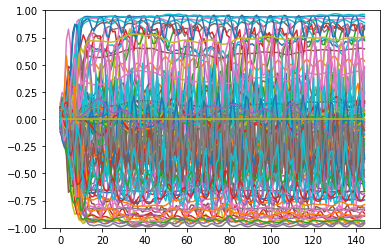

In [10]:
%matplotlib inline
output = []
for i in range(200):
    step=[y[480000+i], y[200000+i]]
   
    output.append(esn.step(step))
    
    plt.clf()
    plt.ylim(-1,1)
    plt.plot(np.array(output[:][-250:]))
    
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.05)

# print(len(np.array(output[0:100]).T[0][0]))
    
for j in range(100):
    output.append(esn.step([0,0]))
    plt.clf()
    plt.plot(np.array(output))
    display.display(plt.gcf())
    
    display.clear_output(wait=True)
    time.sleep(0.0001)

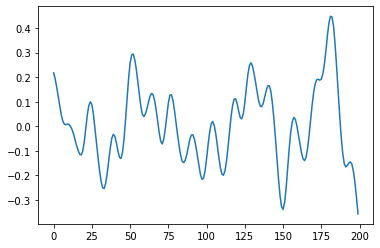

In [19]:

plt.plot( range(200), y[480000:480200])

In [29]:
np.max(np.abs(la.eig(esn.weights_)[0]))

0.9000000000000022

([array([1., 0., 0., 0., 4., 0., 0., 0., 1., 1.]),
  array([0., 1., 0., 0., 4., 0., 1., 1., 0., 0.]),
  array([0., 2., 0., 0., 4., 0., 0., 0., 1., 0.]),
  array([0., 0., 1., 0., 4., 1., 0., 1., 0., 0.]),
  array([1., 2., 0., 0., 3., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 3., 1., 1., 0., 0., 1.]),
  array([1., 1., 0., 0., 5., 0., 0., 0., 0., 0.])],
 array([-0.81261474, -0.63343925, -0.45426376, -0.27508827, -0.09591278,
         0.08326271,  0.26243819,  0.44161368,  0.62078917,  0.79996466,
         0.97914015]),
 <a list of 7 Lists of Patches objects>)

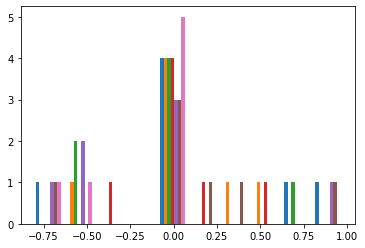

In [6]:
plt.hist(np.arcsin(esn.weights_))

In [8]:
print(esn.weights_)

[[ 6.81590717e-01  0.00000000e+00  2.48795324e-01  0.00000000e+00
  -4.98385646e-01  0.00000000e+00  1.48019319e-01 -5.28336153e-01
   0.00000000e+00  3.95026077e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.72910770e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.54774397e-01  0.00000000e+00
   5.84596121e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.76944835e-02
   0.00000000e+00  1.15187559e-01  0.00000000e+00 -3.57421965e-01
   0.00000000e+00  0.00000000e+00 -4.21016066e-01  0.00000000e+00]
 [ 5.22072408e-01  0.00000000e+00 -6.15924373e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  5.99446830e-01 -2.54604880e-01  0.00000000e+00
   0.00000000e+00 -1.10435294e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  6.42911566e-01  0.00000000e+00]
 [ 0.00

In [79]:
esn.input_weights_

array([[ 0.        , -0.79133281],
       [ 0.06728107, -0.93031874],
       [-0.29524819,  0.        ],
       [ 0.        , -0.83853097],
       [-0.73797457,  0.        ],
       [-0.79558809,  0.82483979],
       [-0.71295287, -0.93058944]])

In [5]:
i=300

In [10]:
step=[y[480000+i], y[500000+i], y[60000+i], y[200000+i]]
i += 1

In [11]:
print(esn.step(step))

[-0.08201698  0.10271518  0.07087403 -0.02058211  0.04143997 -0.04830721]


In [8]:
esn.input_weights_.dot(step)

array([-0.00576191,  0.00538854,  0.070144  , -0.00147441,  0.        ,
        0.        ])

In [27]:
esn.weights_

array([[-6.18190814e-04, -5.64924848e-01, -1.52656675e-01,
        -5.28673076e-01,  0.00000000e+00,  5.84151125e-01],
       [-5.53180569e-01,  8.03822066e-01,  0.00000000e+00,
         7.04248724e-03,  1.84029920e-02, -8.51010530e-01],
       [ 4.07201998e-01,  8.66997878e-01, -5.92502488e-01,
        -6.56200175e-01, -2.19982541e-01,  3.39588763e-01],
       [-8.73665820e-01, -2.29833706e-01,  0.00000000e+00,
         5.08516539e-01, -2.64034955e-01,  3.55941296e-01],
       [ 0.00000000e+00,  8.31086799e-01,  5.90473268e-01,
         1.93745300e-01,  1.13393973e-01,  8.74175808e-01],
       [-4.31079426e-01, -8.53494964e-01, -7.22265182e-01,
         0.00000000e+00,  8.32118591e-01, -1.49714577e-02]])

In [4]:
esn.state_

array([0., 0., 0., 0., 0., 0.])

In [82]:
count=0
outputarray=np.array(output).T
for line in outputarray:
    count+=1
    sf.write(f'soundfile{count}.wav', line, sr)